### Multi Class Classification

In [1]:
# import the relevant libraries
import torch
from torch import nn

# import torchvisiomn and its modules
import torchvision
from torchvision import datasets

from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import optim

# library for visualization
import matplotlib.pyplot as plt

In [2]:
# check the version of the torch and torchvision
print(f"PyTorch Version: {torch.__version__} \nTorch Vision Version: {torchvision.__version__}")

PyTorch Version: 2.0.1+cu118 
Torch Vision Version: 0.15.2+cu118


### Getting the dataset

Note: Computer vision model uses the computer vision dataset

- MNIST => Modified National Institute of Standards and Technology

### Download the dataset

In [3]:
# create the training data
train_data = datasets.FashionMNIST(
    root = "Data", # where the dataset needs to be download
    train = True, # get training data
    download = True, # download the dataset
    transform = ToTensor(), # convert the images into an tensor of float32 type
    target_transform = None # set the target transform into None (Nothing)
)

# create the testing data
test_data = datasets.FashionMNIST(
    root = "Data",
    train = False, # requires an testing data not an training data
    download = True,
    transform = ToTensor()
)

In [4]:
# check the sample of the dataset (population)
image, label = train_data[0]
print(f"Image: {image}, \n Label: {label}")

Image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

Note: The image would be an greyscale image

### Input and Output shapes of the computer vision model

In [5]:
# target (output) would be one (label)
# check the shape of the image
print(f"Shape of the image: {image.shape}")  # 28 x 28 pixels in 1 channel

"""
    [1, 28, 28] => 1: channel
                   28: height
                   28: width
"""

Shape of the image: torch.Size([1, 28, 28])


'\n    [1, 28, 28] => 1: channel\n                   28: height\n                   28: width\n'

In [6]:
# check for the training and testing data
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

Note: 60000 samples for training and 10000 samples for testing

In [7]:
# check the available classes in the FashionMNIST data
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Visualize the data

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Lbael: 9')

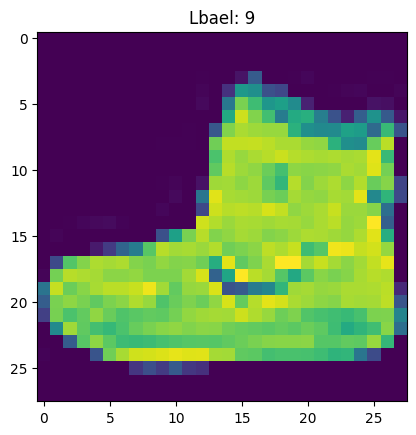

In [8]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
#print(f"Squeezed data: {image.squeeze().shape}") # remove the color channel
plt.imshow(image.squeeze())
plt.title(f"Lbael: {label}")

Text(0.5, 1.0, 'Label: Ankle boot')

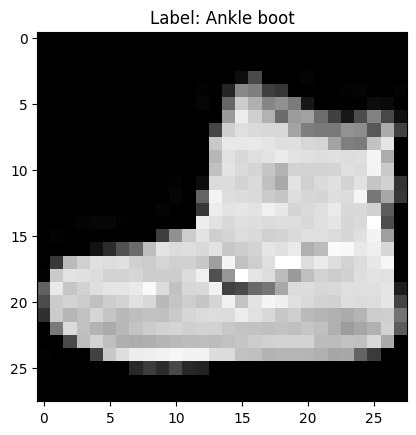

In [9]:
# convert the image into grayscale
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(f"Label: {class_names[label]}")

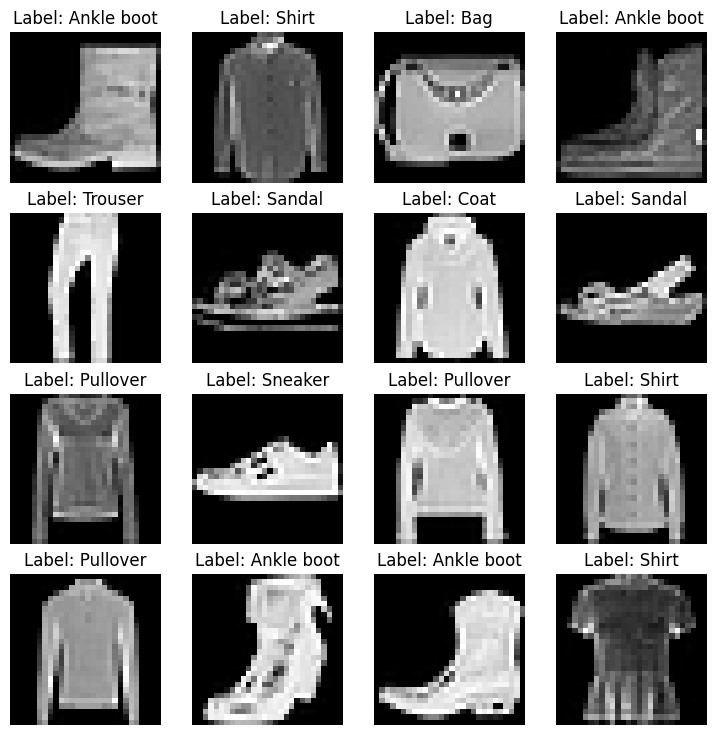

In [10]:
# examine the other images with different labels
torch.manual_seed(42)
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()  # remove the tensor and only allows the data
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")
    plt.title(f"Label: {class_names[label]}")
    # remove the noisyness
    plt.axis(False)

### Create an Data Loader

In [11]:

# set the batch size
BATCH_SIZE = 32 # hyperparameter

# turn the dataset into iterables (batches)
train_DataLoader = DataLoader(train_data, # dataset into an iterables
    batch_size = BATCH_SIZE, # how many smaples per epoch ?
    shuffle = True # shuffle the data every epoch
)

# create an test loader
test_DataLoader = DataLoader(test_data,
    batch_size = BATCH_SIZE,
    shuffle = False # it is not mandatory to shuffle the testing data
)

In [12]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
# let's check the data created in the dataloader
print(f"DataLoaders: {train_DataLoader, test_DataLoader}")
print(f"Length of the train loader: {len(train_DataLoader)} batches of {BATCH_SIZE}")
print(f"Length of the test loader: {len(test_DataLoader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000013566333E90>, <torch.utils.data.dataloader.DataLoader object at 0x00000135663B0D10>)
Length of the train loader: 1875 batches of 32
Length of the test loader: 313 batches of 32


In [14]:
type(train_DataLoader)

torch.utils.data.dataloader.DataLoader

In [15]:
# check the data in thw train loader
# train_DataLoader -> is an iterable
train_features_batch, train_labels_batch = next(iter(train_DataLoader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Note: 32 data for each batch (1875)

Image Size: torch.Size([1, 28, 28])
Label: 6, label_size: torch.Size([])


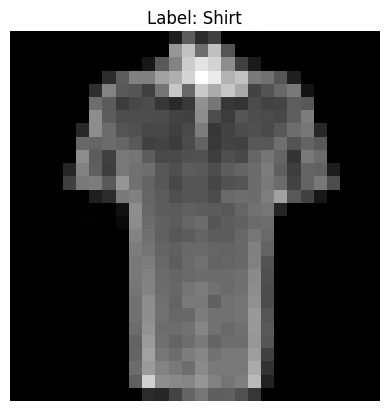

In [16]:
# check the sample data
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap = "gray")
plt.title(f"Label: {class_names[label]}")
plt.axis("Off")

print(f"Image Size: {img.shape}")
print(f"Label: {label}, label_size: {label.shape}")

### Building an Baseline model

In [17]:
# experiment with the flatten layer
flatten_model = nn.Flatten() 

# get an single sample
x = train_features_batch[0]

# convert the image into an single vector (single dimension)
# flatten the sample
output = flatten_model(x)  # forward pass

print(f"Shape before flattening: {x.shape} -> [color_channles, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channles, height * width]")

# one long feature vector

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channles, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channles, height * width]


Note: the nn.Linear() would like an feature vector

In [18]:
# create an model
class FashionMnistModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in an vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features => it would be the height * width (One long vector)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)
        
# 784 pixels for each image (height * width)

In [19]:
# set the reproducible seed
torch.manual_seed(42)

# create an object for the model
modelV0 = FashionMnistModelV0(input_shape=784, hidden_units=10, output_shape=10)

# set the model to train on CPU
modelV0.to("cpu")

FashionMnistModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### Setup the loss, optimizer and evaluation metrics

In [20]:
# setup the custom accuracy method
def accuracyFn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # claculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [21]:
# setup the loss and optimizer for multi class classification
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(params=modelV0.parameters(), lr=0.1)

### Create an time function to measure the performance

In [22]:
# import the time module
from timeit import default_timer as timer

# create an function to calculate the time to train the model
def time_train(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Create an training loop

In [23]:
# progress bar
from tqdm.auto import tqdm

# set the reproducible seed
torch.manual_seed(42)

# start the timer
start_cpu = timer()

# set the epochs
epochs = 3

# create an training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")
    
    # set the model into training mode
    train_loss = 0
    
    for batch, (x, y) in enumerate(train_DataLoader):
        
        modelV0.train()
        
        # forward propagation
        y_pred = modelV0(x)
        
        # calculate the loss (per epoch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        # Backpropagation taken place
        # set the optimizer zero grad
        optimizer.zero_grad()
        
        # loss backward
        loss.backward()
        
        # optimizer step
        optimizer.step()
        
        # print out the how many images the model sees
        if batch % 400 == 0:
            print(f"Looked at {batch * len(x)} / {len(train_DataLoader.dataset)} samples")
    
    # calculate the average loss on all epochs
    train_loss /= len(train_DataLoader)
    
    # set the model into inference mode
    test_loss, test_acc = 0, 0
    modelV0.eval()
    
    with torch.inference_mode():
        for x, y in test_DataLoader:
            # forward propagation
            test_pred = modelV0(x)
            
            # calculate the loss
            test_loss += loss_fn(test_pred, y)
            
            # calculate the accuracy
            test_acc += accuracyFn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
        # calculate the average test loss and accuracy
        test_loss /= len(test_DataLoader)
        test_acc /= len(test_DataLoader)
        
    # print the details on the testing process
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# calculate the training time
end_cpu = timer()
total_time = time_train(start = start_cpu, end = end_cpu, device = str(next(modelV0.parameters()).device))

G:\Data_Science\PyTorch\torch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 33%|████████████████████████████                                                        | 1/3 [00:06<00:13,  6.96s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
--------------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:12<00:06,  6.40s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
--------------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:19<00:00,  6.63s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 19.886 seconds


### Evaluate the model

In [29]:
torch.manual_seed(42)

def evaluate_model(model : torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    loss, acc = 0, 0
    
    # set the model into testing (inference) mode
    model.eval()
    
    with torch.inference_mode():
        for x, y in data_loader:
            # predictions
            y_pred = model(x)
            
            # calculate the loss and acuuracy
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # get the predictions label
            
        # scale down the loss and accuracy
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
           }
        

In [31]:
# evaluate the model
modelV0_results = evaluate_model(model=modelV0, data_loader=test_DataLoader, loss_fn=loss_fn, accuracy_fn=accuracyFn)

print(f"Results of the ModelV0: {modelV0_results}")

Results of the ModelV0: {'model_name': 'FashionMnistModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}


### Setup the model runs on GPU

In [32]:
# set the device into gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device : {device}")

Device : cuda


### Building model with non-linearity

In [33]:
# create an model with non-linearity and linear layers
class FashionMnistModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in an vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features => it would be the height * width (One long vector)
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x):
        return self.layer_stack(x)
        
# 784 pixels for each image (height * width)

In [34]:
# intantoiate the model
modelV1 = FashionMnistModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)

In [38]:
# check the model device
next(modelV1.parameters()).device

device(type='cuda', index=0)

In [39]:
# setup loss, optimizer and evaluation metrics
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(params=modelV1.parameters(), lr=0.1)

### Create an training and testing loop

In [49]:
def train_loop(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, optimizer: torch.optim.Optimizer, loss_fn: torch.nn, accuracy_fn, device: torch.device = device):
    train_loss, train_acc = 0, 0
    # set the model to gpu
    model.to(device)
    
    for batch, (x, y) in enumerate(data_loader):
        # send the data into gpu
        x, y = x.to(device), y.to(device)
        
        # forward pass
        y_pred = model(x)
        
        # calculate loss
        loss = loss_fn(y_pred, y)
        
        train_loss += loss
        train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
        
        # optimizer
        optimizer.zero_grad()
        
        # loss backward
        loss.backward()
        
        # set the optimizer step
        optimizer.step()
        
    # calculate the loss and accuracy per epoch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [50]:
# Create an test loop
def test_loop(data_loader: torch.utils.data.DataLoader, model: torch.nn.Module, loss_fn: torch.nn.Module, accuracy_fn, device:torch.device = device):
    test_loss, test_acc = 0, 0
    
    # set the model into gpu
    model.to(device)
    
    # set the model into inference model
    model.eval()
    
    with torch.inference_mode():
        for x, y in data_loader:
            # send the data into gpu
            x, y = x.to(device), y.to(device)
            
            # forward pass
            test_pred = model(x)
            
            # calculate the loss and accracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))
            
        # adjust the metrics
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")

In [51]:
torch.manual_seed(42)

# measure the time
from timeit import default_timer as timer

train_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------")
    train_loop(data_loader=train_DataLoader, model=modelV1, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracyFn)
    test_loop(data_loader=test_DataLoader, model=modelV1, loss_fn=loss_fn, accuracy_fn=accuracyFn)
    
train_end = timer()

total_train_time_gpu = time_train(start=train_start, end=train_end, device=device)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
Train loss: 1.11456 | Train accuracy: 58.46%


 33%|████████████████████████████                                                        | 1/3 [00:09<00:18,  9.14s/it]

Test loss: 0.96320 | Test accuracy: 63.41
Epoch: 1
-------------
Train loss: 0.90905 | Train accuracy: 64.87%


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:16<00:07,  7.96s/it]

Test loss: 0.74544 | Test accuracy: 72.61
Epoch: 2
-------------
Train loss: 0.59508 | Train accuracy: 78.25%


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:25<00:00,  8.39s/it]

Test loss: 0.49708 | Test accuracy: 82.77
Train time on cuda: 25.185 seconds


* create an evaluation method for the model trains on gpu

### Create an evaluation method

In [53]:
torch.manual_seed(42)

def evaluate_model_gpu(model : torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = device):
    loss, acc = 0, 0
    
    # set the model into testing (inference) mode
    model.eval()
    
    with torch.inference_mode():
        for x, y in data_loader:
            # predictions
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            
            # calculate the loss and acuuracy
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # get the predictions label
            
        # scale down the loss and accuracy
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
           }
        

In [54]:
# evaluate the second model
modelV1_results = evaluate_model_gpu(model=modelV1, data_loader=test_DataLoader, loss_fn=loss_fn, accuracy_fn=accuracyFn, device=device)

In [55]:
# chech the modelV1 results
print(f"Model V1 results: {modelV1_results}")

Model V1 results: {'model_name': 'FashionMnistModelV1', 'model_loss': 0.4970788359642029, 'model_acc': 82.76757188498402}


In [56]:
modelV0_results, modelV1_results

({'model_name': 'FashionMnistModelV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMnistModelV1',
  'model_loss': 0.4970788359642029,
  'model_acc': 82.76757188498402})

* Overfitting on the training data (non linear modelV1)

### Build an Convolution Neural Network model (CNN)